# Praca domowa 5
### Sebastian Deręgowski, grupa 1

Wszystkie funkcje zdefiniowane w tym notebooku pochodzą z laboratorium nr 9.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

Wczytujemy nasz zbiór danych i konwertujemy go do typu Array:

In [2]:
data = pd.read_csv("clustering.csv",header=None)
data.head()
data = data.values

### Metoda 1: AgglomerativeClustering

In [3]:
from sklearn.cluster import AgglomerativeClustering

def plot_agglomerative_clustering(X, n_clusters, linkage):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    y = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
    plt.title(f'Clusters from agglomerative_clustering with {linkage} linkage')
    plt.show()

Aby zobaczyć jak wygląda nasz zbiór ustalmy jako liczbę klastrów 1:

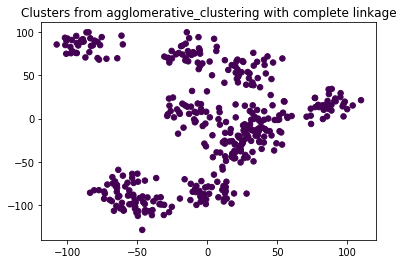

In [4]:
plot_agglomerative_clustering(data,1,'complete')

Na oko wydaje się, że mamy tu do czynienia z 8 klastrami. Sprawdźmy czy metoda silhouette potwierdzi te przypuszczenia:

In [5]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

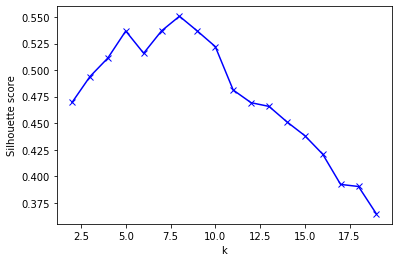

In [6]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 20)
silhouette_vec = count_clustering_scores(data, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Widzimy zdecydowany peak dla k bliskiego 8. Sprawdźmy jak będzie wyglądał podział dla wszystkich możliwych wartości parametru linkage.

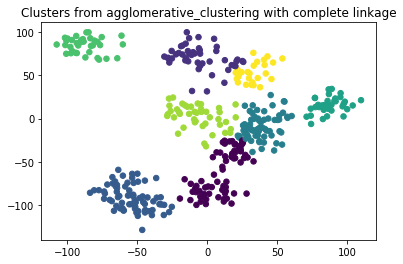

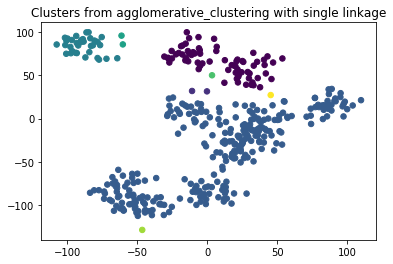

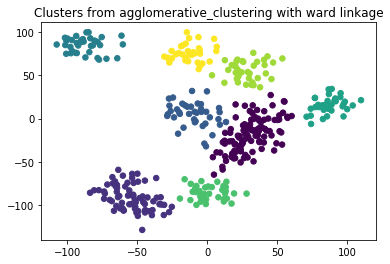

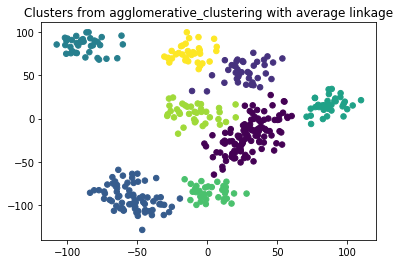

In [7]:
for linkage in {'ward', 'complete', 'average', 'single'}:
    plot_agglomerative_clustering(data, n_clusters=8, linkage=linkage)

Poza single linkage wszystkie pozostałe metody (z dokładnością do pojedynczych odstających punktów) uzyskały zbliżone klastery, które są bliskie podziałowi, którego dokonalibyśmy "ręcznie". Complete linkage różni się nieco od pozostałych jeśli chodzi o skupienie punktów w centralnej części wykresu.

### Metoda 2: KMeans

In [8]:
from sklearn.cluster import KMeans

def plot_kmeans_clusters(X, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
    plt.title('K-means clusters')
    plt.show()

Na początek ustalmy liczbę klastrów jako 8:

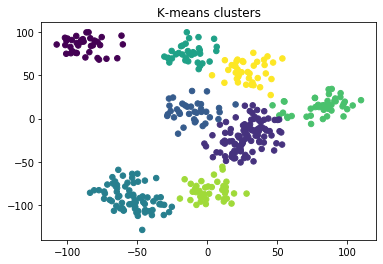

In [9]:
plot_kmeans_clusters(data,8)

Widzimy podział bardzo zbliżony do metody AgglomerativeClustering. Sprawdźmy czy metoda łokcia potwierdzi optymalną liczbę klastrów zadaną przez metodę silhouette:

In [10]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        km = KMeans(n_clusters=k,random_state=0)
        km.fit(X)
        wcss = km.score(X) * -1
        scores.append(wcss)
    return scores

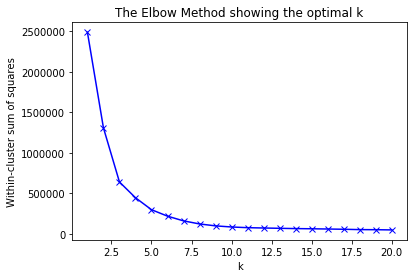

In [11]:
wcss_vec = count_wcss_scores(data, 20)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Trudno jednoznacznie wybrać punkt przegięcia, ale raczej nie wydaje się, żeby był on bliski 8, raczej przyjmuje on wartość z zakresu [2.5 - 7.5]. Sprawdźmy zatem jak wyglądałby podział dla takiej liczby klastrów:

k=3


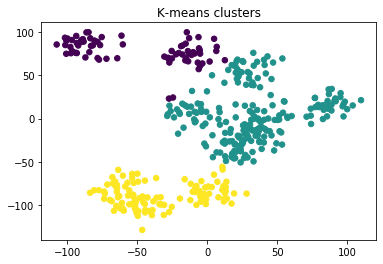

k=4


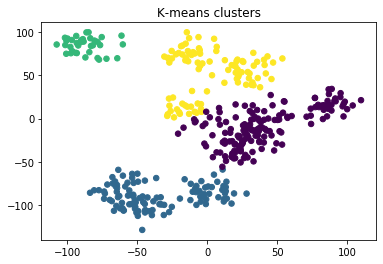

k=5


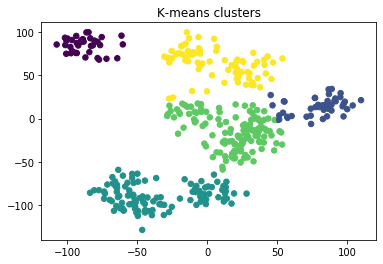

k=6


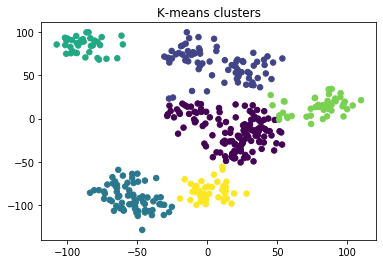

k=7


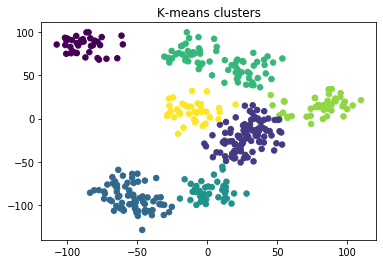

In [14]:
for i in range(3,8):
    print(f"k={i}")
    plot_kmeans_clusters(data,i)

Subiektywnie wydaje mi się, że podział na 8 klastrów był lepszy, co potwierdza, że metoda łokcia nie jest najlepszym wyznacznikiem przy doborze liczby klastrów.